<a href="https://colab.research.google.com/github/mfseven56/CRC/blob/master/CRC_deneme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#COLORACTEL CANCER ABNORMAL TISSUE CLASSIFICATION
import keras
from keras.layers.normalization import BatchNormalization
import numpy as np
import math
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.layers import Input,Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils
from keras.layers.advanced_activations import LeakyReLU
%matplotlib inline
keras.backend.set_image_data_format('channels_last')


Using TensorFlow backend.


In [0]:
import tensorflow.compat.v1 as tf


In [0]:
# !! Yapay sinir ağı modelini buraya oluşturmak lazım. YSA son katmanında 8 nöron olmalı
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(150,150,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',input_shape=(150,150,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(32, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(8, activation='softmax'))

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy']) 

In [12]:
# Data augmentation
batch_size=4

train_datagen = ImageDataGenerator(rescale=1./255,
                         horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         zoom_range = 0.2,
                         rotation_range = 180,
                         shear_range=0.2
                        )

valid_datagen = ImageDataGenerator(rescale=1./255)

# !! Aşağıda eğitim verisi yolunun adresini koymak lazım

train_generator=train_datagen.flow_from_directory(('C:/Users/fatih/Desktop/data/train'), 
                                                 target_size=(150,150),
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

# !! Aşağıda doğrulama verisi yolunun adresini koymak lazım

valid_generator = valid_datagen.flow_from_directory(('C:/Users/fatih/Desktop/data/valid'), 
                                                 target_size=(150,150),
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)


FileNotFoundError: ignored

In [0]:
#Callbacks
def get_callbacks(name_weights, patience_lr):
    mcp_save = ModelCheckpoint(name_weights, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=patience_lr, verbose=2, min_delta=1e-4, mode='min')
    early_stop_cr=EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=20, verbose=2, mode='auto', restore_best_weights=True)
    return [mcp_save, reduce_lr_loss, early_stop_cr]


In [0]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_valid=valid_generator.n//valid_generator.batch_size

name_weights = "final_model3.h5"
callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)

model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_steps=step_size_valid,
                   validation_data=valid_generator,
                   epochs=20,
                   verbose=1,
                   callbacks = callbacks)

Epoch 1/20
1000/1000 [==============================] - 69s 69ms/step - loss: 1.1017 - accuracy: 0.5185 - val_loss: 0.6801 - val_accuracy: 0.6310
Epoch 2/20
1000/1000 [==============================] - 67s 67ms/step - loss: 0.8308 - accuracy: 0.6622 - val_loss: 1.2123 - val_accuracy: 0.6627
Epoch 3/20
1000/1000 [==============================] - 67s 67ms/step - loss: 0.7062 - accuracy: 0.7070 - val_loss: 0.1270 - val_accuracy: 0.7262
Epoch 4/20
1000/1000 [==============================] - 67s 67ms/step - loss: 0.6379 - accuracy: 0.7502 - val_loss: 1.2876 - val_accuracy: 0.7917
Epoch 5/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.6211 - accuracy: 0.7605 - val_loss: 0.4502 - val_accuracy: 0.7659
Epoch 6/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.6121 - accuracy: 0.7678 - val_loss: 1.1938 - val_accuracy: 0.7917
Epoch 7/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.5589 - accuracy: 0.7847 - val_loss: 0.2716 -

In [0]:
model.evaluate_generator(generator=valid_generator, steps=step_size_valid)

[0.06963846832513809, 0.9067460298538208]

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(('C:/Users/fatih/Desktop/data/test'), 
                                                 target_size=(150,150),
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=False)
step_size_test=test_generator.n//test_generator.batch_size
model.evaluate_generator(generator=test_generator, steps=step_size_test)

Found 496 images belonging to 8 classes.


[0.11514195799827576, 0.8911290168762207]

In [0]:

import PIL
import matplotlib.pyplot as plt # Graph
from PIL import Image
import numpy
for i in range(1,41):
    img = Image.open('C:/Users/fatih/Desktop/a/'+str(i)+'.tif')
   # imgarr = img.convert("L")
    imgarr = numpy.array(img)
    imgarr=imgarr/255
    imgarr = imgarr.reshape((1,150,150,3))
    
    predictions = model.predict(imgarr)
#print(predictions)
    print (numpy.argmax(predictions))
    plt.show()

0
0
3
3
0
4
1
7
1
1
2
6
5
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
1
6
1
7
7
7
7
4


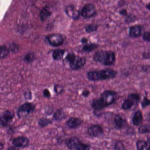

In [0]:
img
